In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
import seaborn as sns
import pingouin as pg
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

plt.rcParams['figure.figsize']= (15,10)

In [2]:
df= sns.load_dataset('taxis')
df.dropna(how= 'any', subset= ['pickup_borough', 'dropoff_borough'], inplace=True)
print(df.isnull().sum())

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            42
pickup_zone         0
dropoff_zone        0
pickup_borough      0
dropoff_borough     0
dtype: int64


In [3]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


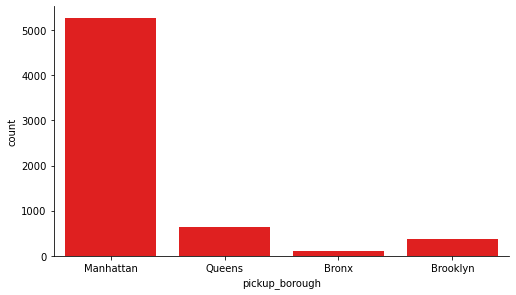

In [4]:
sns.catplot(data= df, x= 'pickup_borough', kind= 'count', color= 'red', height= 4, aspect= 1.77)
plt.show();

In [5]:
manhatt_data= pd.get_dummies(df['pickup_borough'], dummy_na= False)
df['ManHat_true']= manhatt_data['Manhattan']
df['Queens_true']= manhatt_data['Queens']
df['tip_ornot']= df['tip'].apply(lambda x: 1 if x>0 else 0)
df['gnot']= df['color'].apply(lambda x: 0 if x== 'green' else 1)
df

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,ManHat_true,Queens_true,tip_ornot,gnot
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,1,0,1,1
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,1,0,0,1
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,1,0,1,1
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,1,0,1,1
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan,1,0,1,0
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx,0,1,0,0
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn,0,0,0,0
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn,0,0,0,0


In [6]:
df['cred_card']= df['payment'].apply(lambda x: 1 if x=='credit card' else 0)
df

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,ManHat_true,Queens_true,tip_ornot,gnot,cred_card
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,1,0,1,1,1
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,1,0,0,1,0
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,1,0,1,1,1
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,1,0,1,1,1
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan,1,0,1,0,1
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx,0,1,0,0,1
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn,0,0,0,0,0
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn,0,0,0,0,1


C:\Users\smurk\anaconda3\lib\site-packages\seaborn\categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


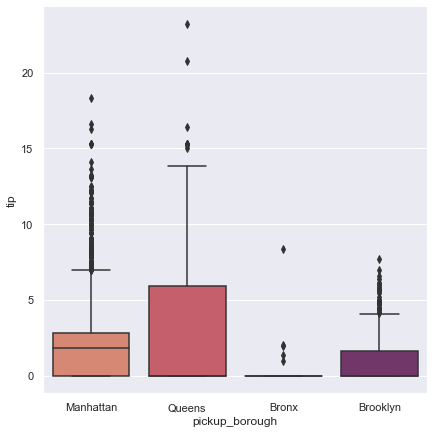

In [7]:
sns.set(font_scale= 1)
sns.catplot(data= df, x= 'pickup_borough', y='tip',kind='box', palette= 'flare', size= 6)
plt.show();

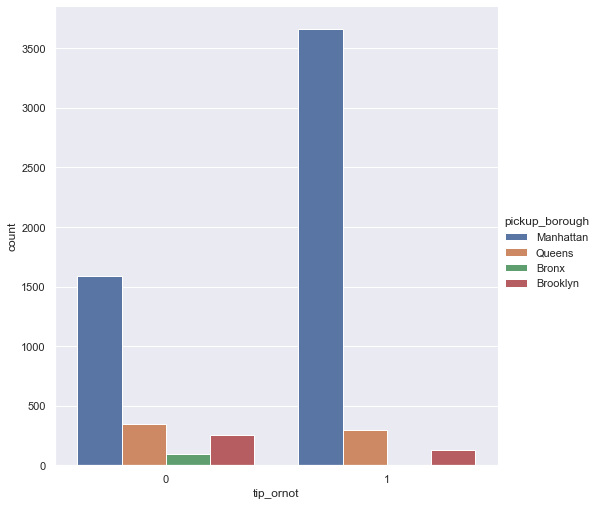

In [8]:
sns.catplot(data= df, x= 'tip_ornot',kind= 'count',  hue= 'pickup_borough', height= 7, aspect= 1)
plt.show();

C:\Users\smurk\anaconda3\lib\site-packages\seaborn\categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


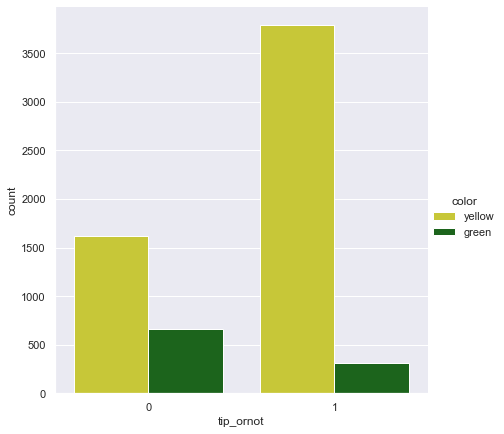

In [9]:
sns.catplot(data= df, x= 'tip_ornot',hue='color', palette= sns.color_palette(['Yellow', 'Green'], desat= 0.75),kind= 'count', size= 6)
plt.show();

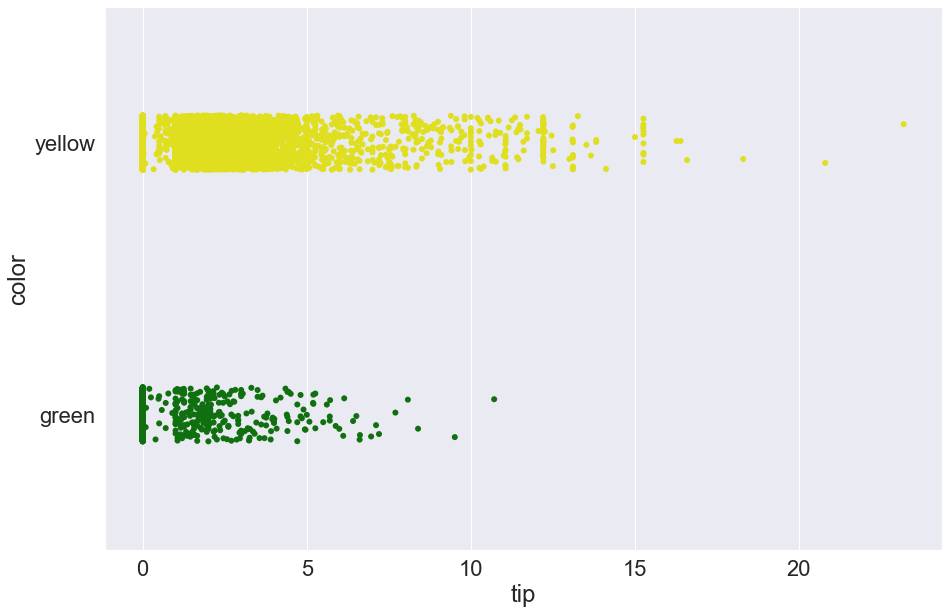

In [10]:
sns.set(font_scale= 2)
sns.stripplot(data= df, x= 'tip', y='color', palette= sns.color_palette(['Yellow', 'Green'], desat= 0.75) ,size= 6)
plt.show();

In [11]:
#predicting whether a passenger will give a tip depending upon if they pickup the taxi from Manhattan and the distance they travelled.

In [12]:
logmodel= LogisticRegression(solver= 'liblinear')
X_train, x_test, Y_train, y_test= train_test_split(df[['distance', 'ManHat_true']], df['tip_ornot'], test_size= 0.2)
logmodel.fit(X_train, Y_train)
pred_values= logmodel.predict(x_test)
print(logmodel.score(x_test, y_test))
print(confusion_matrix(pred_values, y_test))
print(classification_report(pred_values, y_test))

0.6836335160532498
[[143  89]
 [315 730]]
              precision    recall  f1-score   support

           0       0.31      0.62      0.41       232
           1       0.89      0.70      0.78      1045

    accuracy                           0.68      1277
   macro avg       0.60      0.66      0.60      1277
weighted avg       0.79      0.68      0.72      1277



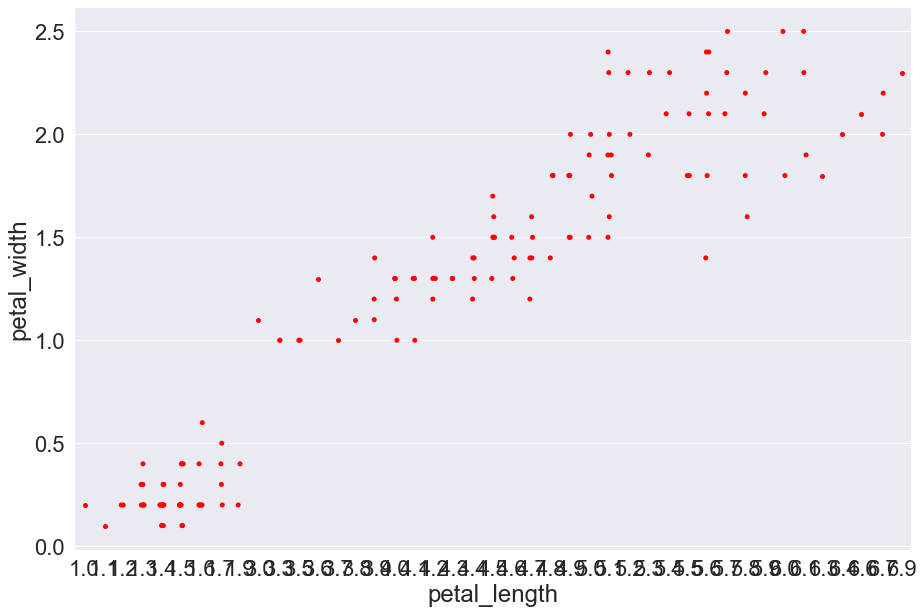

In [13]:
df1= sns.load_dataset('iris')
sns.stripplot(data= df1, x= 'petal_length', y= 'petal_width', color= 'red')
plt.show();

In [14]:
from sklearn.cluster import KMeans
nK= 3
km= KMeans(n_clusters= nK)
km.fit(df1[['petal_length', 'petal_width']])
km.cluster_centers_

array([[1.462     , 0.246     ],
       [4.26923077, 1.34230769],
       [5.59583333, 2.0375    ]])

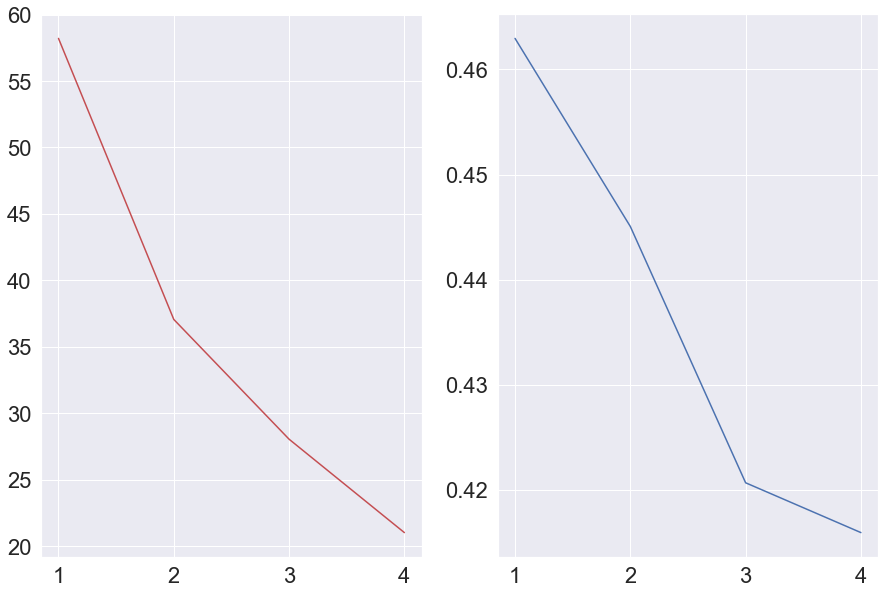

In [15]:
# appropriate number of clusters: Quallititave or Quantitave using Silhoutte Test and Elbow Test
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
ssd= np.zeros(4)
sils= np.zeros(4)
no_clusters= 5
for k in range(1, no_clusters):
    temp_CL= KMeans(n_clusters= k+1).fit(df1[['sepal_length', 'sepal_width']])
    ssd[k-1]= np.mean(temp_CL.inertia_)
    
    s=  silhouette_samples(df1[['sepal_length', 'sepal_width']],temp_CL.predict(df1[['sepal_length', 'sepal_width']]))
    sils[k-1]= np.mean(s)
    
fig,ax= plt.subplots(1,2)
ax[0].plot(range(1, no_clusters), ssd, 'r-')
ax[1].plot(range(1, no_clusters), sils, 'b-')
plt.show();

In [16]:
print(temp_CL.cluster_centers_)

[[5.85777778 2.71333333]
 [4.76666667 2.89166667]
 [6.56216216 3.05945946]
 [5.1875     3.6375    ]
 [7.475      3.125     ]]


In [17]:
from sklearn.cluster import DBSCAN
df=sns.load_dataset('mpg')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


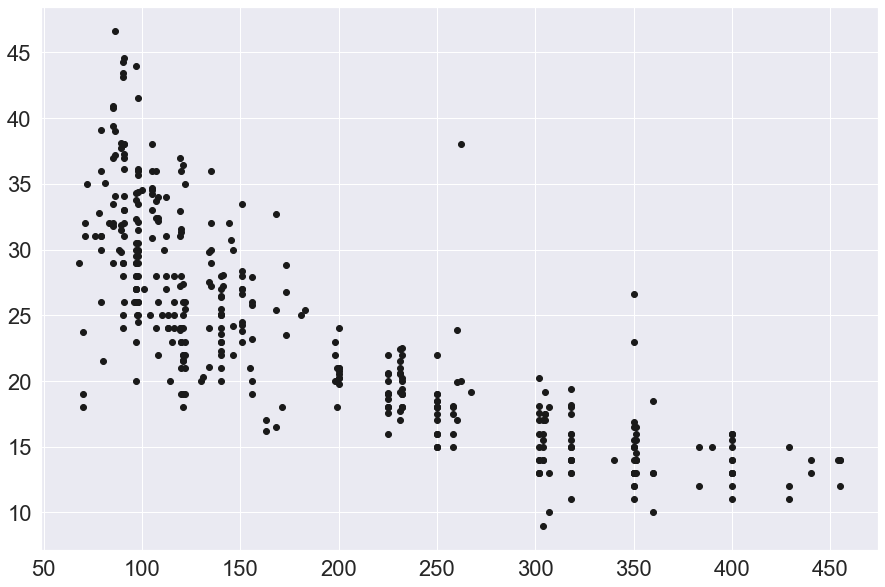

In [18]:
plt.plot(df['displacement'], df['mpg'], 'ko')
plt.show();

In [19]:
clustmodel= DBSCAN(eps= 0.75, min_samples= 6).fit(df[['displacement', 'mpg']])
clustmodel.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  2, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1,  1, -1,  2, -1, -1, -1, -1, -1, -1, -1,  4, -1, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  2, -1, -1, -1, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1,  4,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  4,
        0, -1, -1, -1, -1,  2, -1, -1, -1, -1,  4, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  2, -1,  0

In [20]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

df.dropna(how= 'any', inplace=True)

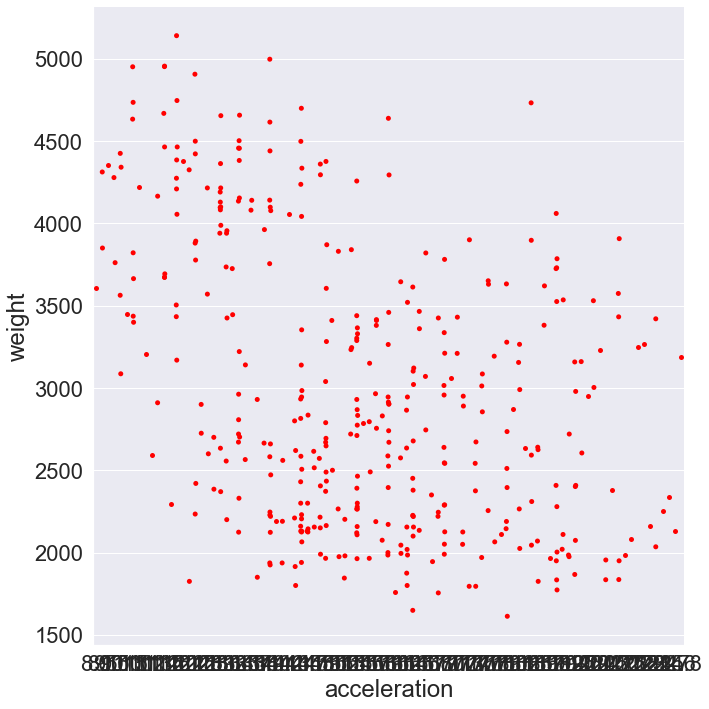

In [21]:
sns.catplot(data= df, x= 'acceleration', y='weight', color= 'red', height= 10)
plt.show();

In [22]:
data_fin= df[['acceleration', 'weight']]
from sklearn.cluster import KMeans
KMclusmodel= KMeans(n_clusters= 2)
KMclusmodel.fit(data_fin)
KMclusmodel.cluster_centers_



array([[  16.20211864, 2381.38135593],
       [  14.54166667, 3879.53205128]])

In [23]:
from sklearn.cluster import DBSCAN
df_fin= df[['displacement', 'mpg']]
DBSCANmodel= DBSCAN(eps= 0.6, min_samples= 5)
DBSCANmodel.fit(df_fin)
lab= (DBSCANmodel.labels_)
lab

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  3, -1, -1, -1, -1,
        4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  2, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  3, -1, -1, -1,
       -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,
       -1,  3, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        2, -1,  0, -1, -1

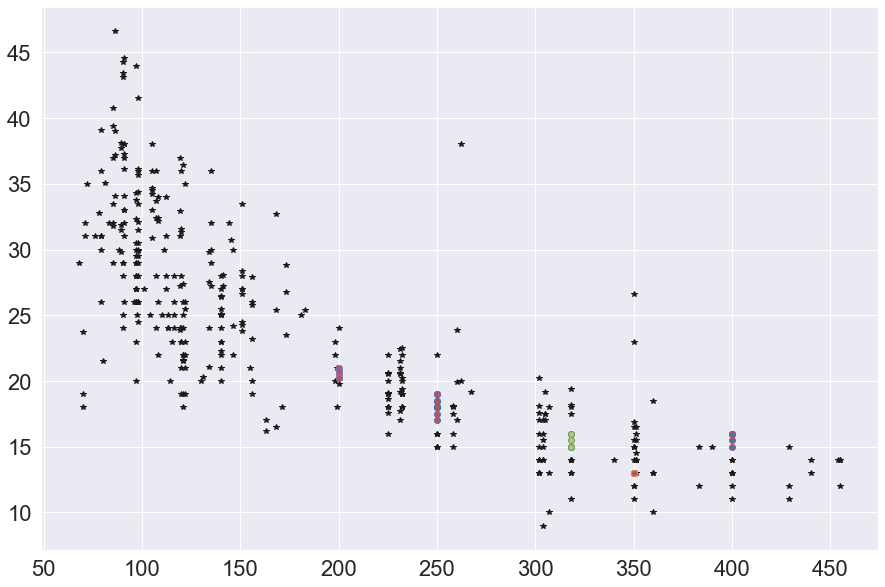

In [24]:
import random
clusters= max(DBSCANmodel.labels_)+1
plt.plot(df_fin['displacement'][lab== -1], df_fin['mpg'][lab== -1], 'k*')
for k in range(clusters):
    plt.plot(df_fin['displacement'][lab== k], df_fin['mpg'][lab== k], 'o', markerfacecolor= random.choice(['r', 'b', 'g', 'y']))
    
plt.show();


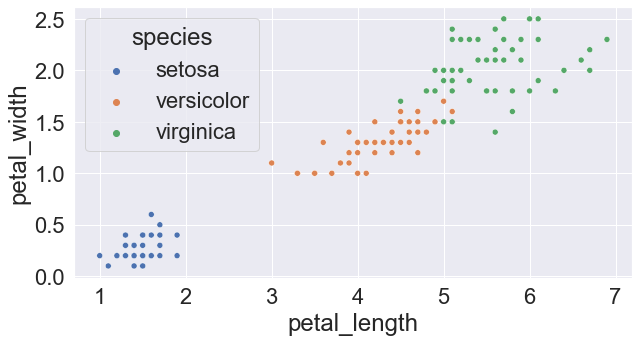

In [38]:
df= sns.load_dataset('iris')
plt.rcParams['figure.figsize']= (10,5)
sns.scatterplot(data= df, x= 'petal_length', y='petal_width', hue= 'species')
plt.show();

In [36]:
from sklearn.cluster import KMeans
df1= df[['petal_length', 'petal_width']]
KM_model= KMeans(n_clusters= 3)
KM_model.fit(df1)
print(KM_model.cluster_centers_)
print(KM_model.labels_)



[[4.26923077 1.34230769]
 [1.462      0.246     ]
 [5.59583333 2.0375    ]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 2]


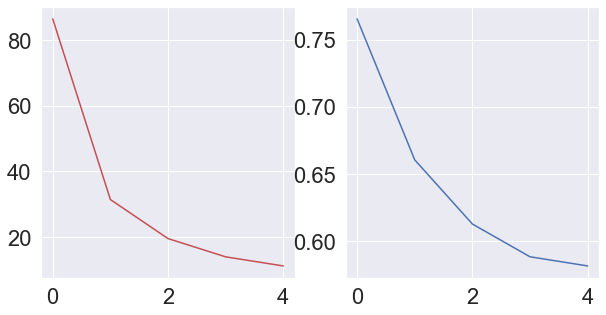

In [44]:
# appropriate no of clusters through KMeans clustering
from sklearn.metrics import silhouette_samples

no_clust= 5
fig, ax= plt.subplots(1, 2)

elb_test= np.zeros(no_clust)
silh_test= np.zeros(no_clust)

for k in range(1, no_clust+1):
    temp_mod= KMeans(n_clusters= k+1).fit(df1)
    elb_test[k-1]= np.mean(temp_mod.inertia_)
    
    s= silhouette_samples(df1, temp_mod.predict(df1))
    silh_test[k-1]= np.mean(s)
    
ax[0].plot(range(no_clust), elb_test, 'r-')
ax[1].plot(range(no_clust), silh_test, 'b-')
plt.show();
    
    

In [49]:
from sklearn.cluster import DBSCAN
DB_model= DBSCAN(eps= 0.4, min_samples= 5)
DB_model.fit(df1)
lab= DB_model.labels_
lab

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

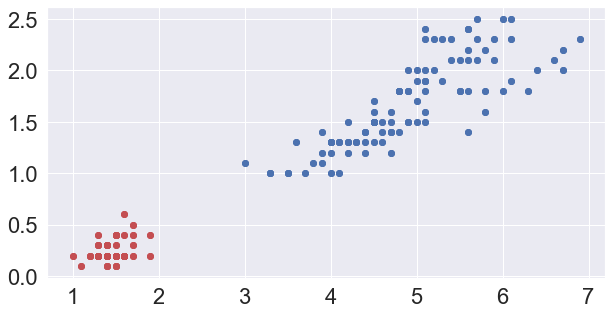

In [53]:
no_clust= max(lab)+1
for k in range(no_clust):
    plt.plot(df1.iloc[lab==0]['petal_length'], df1[lab==0]['petal_width'], 'ro')
    plt.plot(df1.iloc[lab==1]['petal_length'], df1[lab==1]['petal_width'], 'bo')

plt.show();